# Data Import

In [3]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


------class run complete------



# Feature scaling

In [4]:
'''#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.'''

'#scaling the feature dataset:\nfrom sklearn.preprocessing import StandardScaler \n#formula for scaling: x_scaled = (x - mean)/std_deviation\n# fit the Scaler\nscaler = StandardScaler() #creating an instance of the StandardScaler class.\n#Scaling the values such that the mean is 0 and std deviation is 1.\nscaler.fit(X_train) #fitting the scaler to the training set.\nX_train = scaler.transform(X_train) #transforming the training set. \nX_test = scaler.transform(X_test) #transforming the testing set.'

# Initial Model

In [5]:
#train Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# train the model
gbc_1 = GradientBoostingClassifier()

#fitting the model to the training set.
gbc_1.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred_1 = gbc_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Gradient Boosting Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Gradient Boosting Metrics----------

Accuracy: 0.8
Precision: 0.8529411764705882
Recall: 0.8055555555555556
F1 Score: 0.8285714285714286

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.85      0.81      0.83        36

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



[[19  5]
 [ 7 29]]


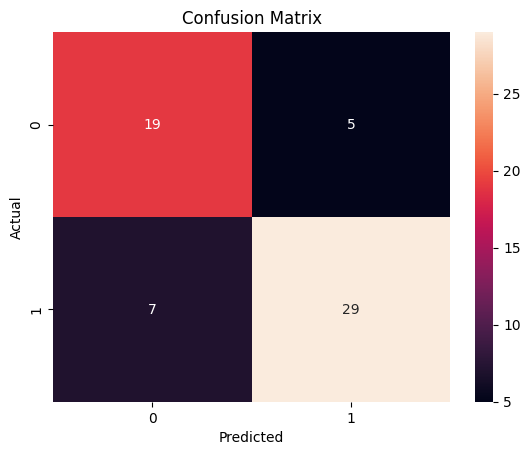

In [6]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search

In [7]:
#grid search for best parameters
#15 secs
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state' : [42],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [30, 40, 50, 100, 200],
    'max_depth': [1, 2, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.1, 0.5, 0.7, 1.0],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

# Fit the grid search to the data
gbc = grid_search.fit(X_train, y_train)

#finding the best estimator:
print("\nbest estimator: ", gbc.best_estimator_)
#finding the best score:
print("best score:  ", gbc.best_score_)
#finding the best parameters:
print("best params: ", gbc.best_params_)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits

best estimator:  GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='sqrt',
                           random_state=42, subsample=0.5)
best score:   0.862595971959497
best params:  {'learning_rate': 0.01, 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42, 'subsample': 0.5}


# Final Model

In [8]:
'''
GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42)
'''
#test the new model with hyperparameters tuned by grid search:
#make predictions on the test dataset
y_pred = gbc.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Gradient Boosting Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)




----------Gradient Boosting Metrics----------

Accuracy: 0.9
Precision: 0.875
Recall: 0.9722222222222222
F1 Score: 0.9210526315789473

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60



## Confusion Matrix

[[19  5]
 [ 1 35]]


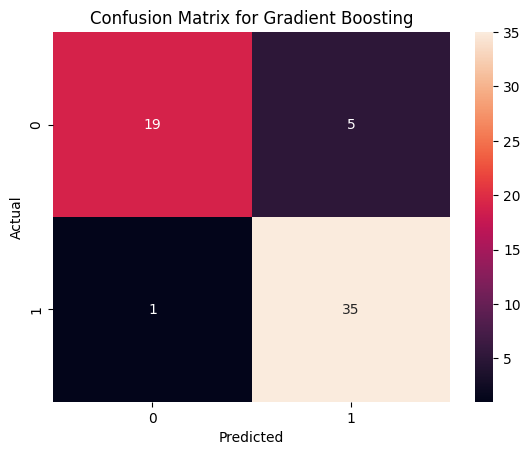

In [9]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [10]:
'''#cross validation for 10 folds
#takes 3 mins to run
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.'''


'#cross validation for 10 folds\n#takes 3 mins to run\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(gbc, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc\n#get the scores for each fold\nfor i in range(10):\n    print("Fold", i, ":", scores[i])\n    \n#get the mean of the scores\nprint("\nMean:", scores.mean())\n#get the standard deviation of the scores\nprint("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold\n#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.\n#get the variance of the scores\nprint("Variance:", scores.var()) #variance is calculated for the scores of each fold\n#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.'

## ROC

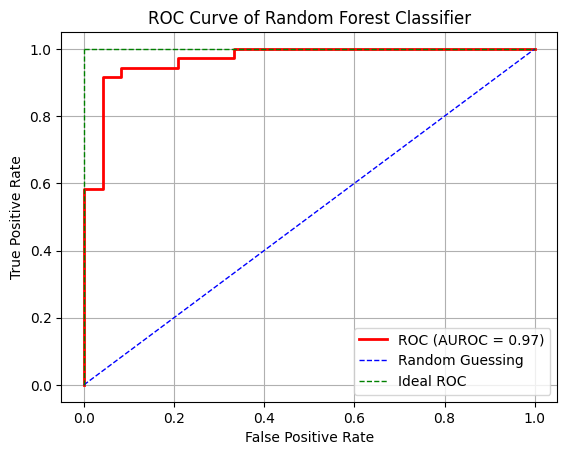

In [11]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#plot the roc curve
y_pred_proba = gbc.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
plt.plot(fpr,tpr,'r', label="ROC (AUROC = %0.2f)" % auc, linewidth = 2) 

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Random Forest Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## PRC

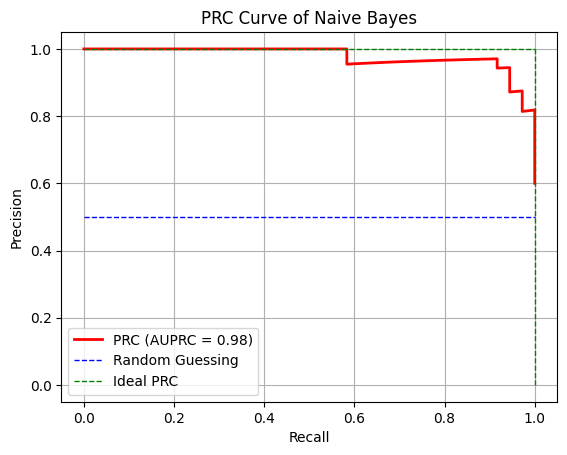

In [12]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Naive Bayes")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

In [13]:
'''#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(gbc, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Naive Bayes Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()'''

'#plot the learning curve for the model\n#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.\nfrom sklearn.model_selection import learning_curve\nimport numpy as np\ntrain_sizes, train_scores, test_scores = learning_curve(gbc, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))\n#train_sizes: the proportion of the training set to include in the learning curve.\n#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.\n#train_scores: the scores for each training subset\n#test_scores: the scores for each testing subset\n\n#plot the learning curve\nimport matplotlib.pyplot as plt\nplt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")\nplt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")\nplt.title("Learning Curve of Naive Bayes Classifier")\nplt.xlabel("Training Set Size")\nplt.ylabel(